# Quantum adder

In this notebook, we will implement with **Qiskit** the quantum circuit to add 2 qubits and a carry in a register of 5 qubits.

This circuit is presented in appendix (1 and 2) of the report .

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [2]:
# Definition of the circuit
# 0: c, 1: x, 2: y, 3: sum, 4: nextC
sub_circuit_adder = QuantumCircuit(5, name='adder')

sub_circuit_adder.toffoli(1, 2, 4)
sub_circuit_adder.toffoli(0, 1, 4)
sub_circuit_adder.toffoli(0, 2, 4)
sub_circuit_adder.cnot(0, 3)
sub_circuit_adder.cnot(1, 3)
sub_circuit_adder.cnot(2, 3)

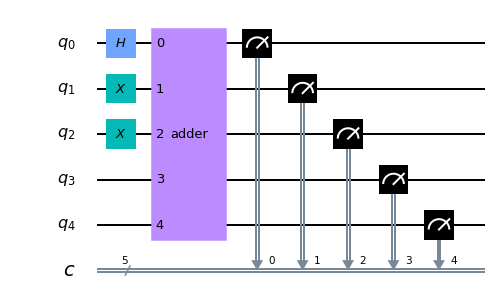

In [3]:
# Use it in a circuit
circuit = QuantumCircuit(5, 5)
circuit.h(0) # c = (1/sqrt(2))(|0> + |1>)
circuit.x(1) # x = |1>
circuit.x(2) # y = |1>
circuit.append(sub_circuit_adder.to_instruction(), list(range(5)))
circuit.measure(list(range(5)), list(range(5)))

circuit.draw()

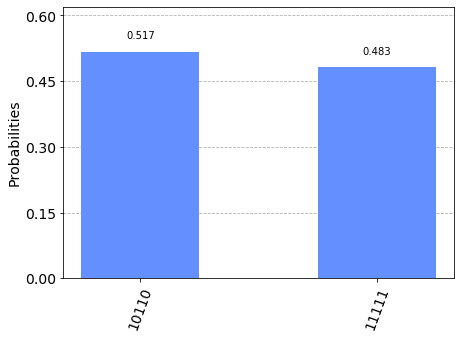

In [4]:
# Simulate the circuit with the Aer module of qiskit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend=simulator, shots=1000)
result = job.result()

# Display results
counts = result.get_counts(circuit)
plot_histogram(counts)

## Observation on the simulation

There are 2 possible outputs:
* |10110>: c=0, x=1, y=1, sum=0, nextC=1, when the carry is 0, 1+1 = 0 and the next carry = 1
* |11111>: c=1, x=1, y=1, sum=1, nextC=1, when the carry is 1, 1+1+1 = 1 and the next carry is 1

**NB**: IBM Q experience uses big endian, q0 is the least significant qubit and q4 is the most significant one

Job Status: job has successfully run


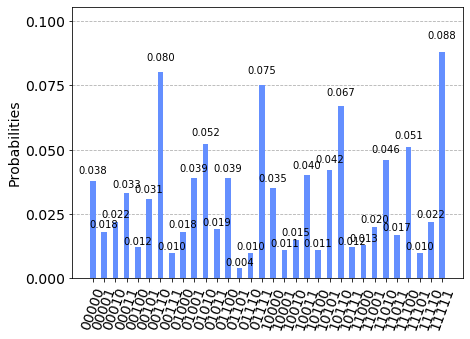

In [5]:
# Simulation on a real Quantum device
qprocessor = least_busy(provider.backends(filters=lambda b: \
                                          not b.configuration().simulator and \
                                          b.configuration().n_qubits == 5 ))
job = execute(circuit, backend=qprocessor, shots=1000)
job_monitor(job)
result = job.result()

# Display the results of the real experiment
counts = result.get_counts(circuit)
plot_histogram(counts)

## Conclusion

The first observation compared to the simulation is that there are way more outputs.
Actually, all possible _pure states_ have been output.
Moreover, the highest frequence is only 8.8% for |11111> which should be about 50%.
Even more surprising is that the state |10110> is not the second most represented pure state but the fourth one with a frequence of 6.7%.
|00110> and |01111> have higher frequences though they have, in theory, a probability of 0.

A first explaination could be that real quantum computer, contrary to simulator, are not reliable and make errors. The more complex the circuit is, the more errors the quantum computer does.
A second explaination could be that our circuit is to long for the quantum computer we used and that decoherence occured before the end of most computations (out of 1000).